In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import math as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
import re
import itertools as it
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


c:\python27\lib\site-packages\pandas\_libs\__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
c:\python27\lib\site-packages\pandas\__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import (hashtable as _hashtable,
c:\python27\lib\site-packages\pandas\core\dtypes\common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import algos, lib
c:\python27\lib\site-packages\pandas\core\util\hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import hashing, tslib
c:\python27\lib\site-packages\pandas\core\indexes\base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  f

In [2]:
dfBuildOwner = pd.read_csv('C:/Users/Asus/Documents/HackerEarth/Dataset/Building_Ownership_Use.csv')
dfBuildStructure = pd.read_csv('C:/Users/Asus/Documents/HackerEarth/Dataset/Building_Structure.csv')
dfTrain = pd.read_csv('C:/Users/Asus/Documents/HackerEarth/Dataset/train.csv')
print dfBuildOwner.shape
print dfBuildStructure.shape
print dfTrain.shape

(1052948, 17)
(1052948, 29)
(631761, 14)


In [3]:
dfTest = pd.read_csv('C:/Users/Asus/Documents/HackerEarth/Dataset/test.csv')
dfMergedTest = dfTest.merge(dfBuildStructure,on='building_id').merge(dfBuildOwner,on='building_id')
print dfMergedTest.shape

(421175, 57)


In [4]:
dfMergedTrain = dfTrain.merge(dfBuildStructure,on='building_id').merge(dfBuildOwner,on='building_id')
print dfMergedTrain.shape

(631761, 58)


In [5]:
def getColumnGroups(df, cols):
    for col in cols:
        plt.show()
        df.groupby([col])['damage_grade'].value_counts(normalize=True).sort_index(ascending=False).plot(kind='barh', figsize = (20, 10))

In [6]:
dfMergedTrain.head()
dfMergedTest.head(10)
# dfMergedTrain['foundation_type'].unique()
# dfMergedTest['foundation_type'].unique()
# dfMergedTrain['roof_type'].unique()
# dfMergedTest['roof_type'].unique()

#dfMergedTrain[dfMergedTrain['area_assesed'] == 'Not able to inspect'].head(20)
#dfMergedTrain['private'].value_counts(normalize=True)

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id_x,district_id_y,vdcmun_id_y,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,district_id,vdcmun_id,ward_id_y,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,0,0.0,2489,24,2489,248903,3,3,21,385,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,1,0,0,0,0,0,0,0,0,0,0,Damaged-Not used,24,2489,248903,Private,2.0,0.0,0,0,0,0,0,0,0,0,0,0
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,0,1.0,4423,44,4423,442304,3,3,33,602,24,24,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,1,0,0,0,0,0,0,Damaged-Repaired and used,44,4423,442304,Private,1.0,1.0,0,1,0,0,0,0,0,0,0,0
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,0,0.0,3650,36,3650,365008,3,3,2,700,21,21,Steep slope,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Attached-1 side,Rectangular,0,0,0,0,0,0,0,0,0,1,0,Not damaged,36,3650,365008,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,0,0.0,3016,30,3016,301605,3,0,3,315,20,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,30,3016,301605,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,0,0.0,3627,36,3627,362705,2,2,22,285,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,36,3627,362705,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


,area_assesed,building_id,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id_x,district_id_y,vdcmun_id_y,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,district_id,vdcmun_id,ward_id_y,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,Both,a3380c4f75,7,0.0,0,0,0,0,0,0,0,1.0,701,7,701,70102,1,1,28,454,9,9,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Attached-1 side,Rectangular,0,1,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,Both,a338a4e653,7,0.0,0,0,0,0,0,0,0,1.0,701,7,701,70103,1,0,25,542,9,0,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Attached-1 side,Rectangular,0,1,0,0,0,0,1,1,0,0,1,Damaged-Rubble unclear,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,Building removed,a338a4e6b7,7,0.0,0,0,0,0,0,0,0,1.0,701,7,701,70103,2,0,35,589,18,0,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,0,0,1,1,0,0,0,Damaged-Rubble Clear-New building built,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,Both,a33a6eaa3a,7,0.0,0,0,0,0,0,0,0,1.0,701,7,701,70106,2,2,22,468,18,18,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,1,0,0,0,1,1,0,0,1,Damaged-Repaired and used,7,701,70106,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,Building removed,a33b073ff6,7,0.0,0,0,0,0,0,0,0,1.0,701,7,701,70107,1,0,24,426,9,0,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Attached-1 side,Rectangular,0,1,1,0,0,0,1,1,0,0,1,Damaged-Rubble Clear-New building built,7,701,70107,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
5,Both,6604e4896c6,7,0.0,0,0,0,0,0,0,0,0.0,701,7,701,70107,2,2,35,468,18,18,Moderate slope,Cement-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,1,0,0,0,1,1,0,0,1,Damaged-Used in risk,7,701,70107,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
6,Both,a33b07430f,7,0.0,0,0,0,0,0,0,0,1.0,701,7,701,70107,2,2,26,654,18,18,Moderate slope,Cement-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,1,0,0,0,1,1,0,0,1,Damaged-Repaired and used,7,701,70107,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
7,Building removed,a33c386cf3,7,0.0,0,0,0,0,0,0,0,1.0,701,7,701,70109,2,0,36,546,18,0,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,0,0,1,1,0,0,1,Damaged-Rubble Clear-New building built,7,701,70109,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
8,Both,a33c386ee7,7,0.0,0,0,0,0,0,0,0,1.0,701,7,701,70109,2,2,35,465,18,18,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used,7,701,70109,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
9,Both,a33c38700f,7,0.0,0,0,0,0,0,0,0,1.0,701,7,701,70109,1,1,35,464,9,9,Moderate slope,

In [7]:
dfList = [dfMergedTrain, dfMergedTest]

# Foundation

In [8]:
for df in dfList:
    #getColumnGroups(dfMergedTrain, ['foundation_type'])
    df['found_RC'] = np.where(df['foundation_type'] == 'RC', 1, 0)
    df['found_mud'] = np.where(df['foundation_type'] == 'Bamboo/Timber', 1, 0)
    df.drop(['foundation_type'], inplace = True, axis = 1)

# Roof

In [9]:
for df in dfList:
    #getColumnGroups(dfMergedTrain, ['roof_type'])
    df['tree_roof'] = np.where(np.logical_or(df['roof_type'] == 'Bamboo/Timber-Light roof', df['roof_type'] == 'Bamboo/Timber-Heavy roof'), 1, 0)
    df.drop(['roof_type'], inplace = True, axis = 1)

# Ground

In [10]:
for df in dfList:
    #getColumnGroups(dfMergedTrain, ['ground_floor_type'])
    df['mud_or_brick_floor'] = np.where(np.logical_or(df['ground_floor_type'] == 'Brick/Stone', df['ground_floor_type'] == 'Mud'), 1, 0)
    df['RC_floor'] = np.where(df['ground_floor_type'] == 'RC', 1, 0)
    df.drop(['ground_floor_type'], inplace = True, axis = 1)

# Other floor

In [11]:
for df in dfList:
    #getColumnGroups(dfMergedTrain, ['other_floor_type'])
    df['other_floor_type'].unique()
    df['timber_2nd_floor'] = np.where(np.logical_or(df['other_floor_type'] == 'TImber/Bamboo-Mud', df['other_floor_type'] == 'Timber-Planck'), 1, 0)
    df['RC_2nd_floor'] = np.where(df['other_floor_type'] == 'RCC/RB/RBC', 1, 0)
    df.drop(['other_floor_type'], inplace = True, axis = 1)

array(['TImber/Bamboo-Mud', 'RCC/RB/RBC', 'Timber-Planck',
       'Not applicable'], dtype=object)

array(['Not applicable', 'TImber/Bamboo-Mud', 'Timber-Planck',
       'RCC/RB/RBC'], dtype=object)

# Position

In [12]:
for df in dfList:
    #getColumnGroups(dfMergedTrain, ['position'])
    df['position'].unique()
    df['attached_1_side'] = np.where(df['position'] == 'Attached-1 side', 1, 0)
    df['attached_0_side'] = np.where(df['position'] == 'Not attached', 1, 0)
    df.drop(['position'], inplace = True, axis = 1)

array(['Not attached', 'Attached-1 side', 'Attached-2 side',
       'Attached-3 side'], dtype=object)

array(['Attached-1 side', 'Not attached', 'Attached-2 side',
       'Attached-3 side'], dtype=object)

# Plan Config

In [13]:
for df in dfList:
    #getColumnGroups(dfMergedTrain, ['plan_configuration'])
    df['plan_configuration'].unique()
    df['rectangular'] = np.where(df['plan_configuration'] == 'Rectangular', 1, 0)
    df['square'] = np.where(df['plan_configuration'] == 'Square', 1, 0)
    df.drop(['plan_configuration'], inplace = True, axis = 1)

array(['Rectangular', 'Square', 'L-shape', 'T-shape', 'Multi-projected',
       'U-shape', 'Others', 'E-shape', 'H-shape',
       'Building with Central Courtyard'], dtype=object)

array(['Rectangular', 'Square', 'L-shape', 'T-shape', 'Multi-projected',
       'U-shape', 'Building with Central Courtyard', 'Others', 'H-shape',
       'E-shape'], dtype=object)

# Ownership

In [14]:
for df in dfList:
    #getColumnGroups(dfMergedTrain, ['legal_ownership_status'])
    df['legal_ownership_status'].unique()
    df['private'] = np.where(np.logical_or(df['legal_ownership_status'] == 'Private', df['legal_ownership_status'] == 'Institutional'), 1, 0)
    df.drop(['legal_ownership_status'], inplace = True, axis = 1)

# dfMergedTrain['condition_post_eq'].value_counts()
# dfMergedTrain = pd.get_dummies(dfMergedTrain, columns = ['condition_post_eq'])
# df.drop(['condition_post_eq'], inplace = True, axis = 1)
# dfMergedTrain['plan_configuration'].unique()
# dfMergedTrain['rectangular'] = np.where(dfMergedTrain['plan_configuration'] == 'Rectangular', 1, 0)
# dfMergedTrain['square'] = np.where(dfMergedTrain['plan_configuration'] == 'Square', 1, 0)

array(['Private', 'Public', 'Other', 'Institutional'], dtype=object)

array(['Private', 'Other', 'Institutional', 'Public'], dtype=object)

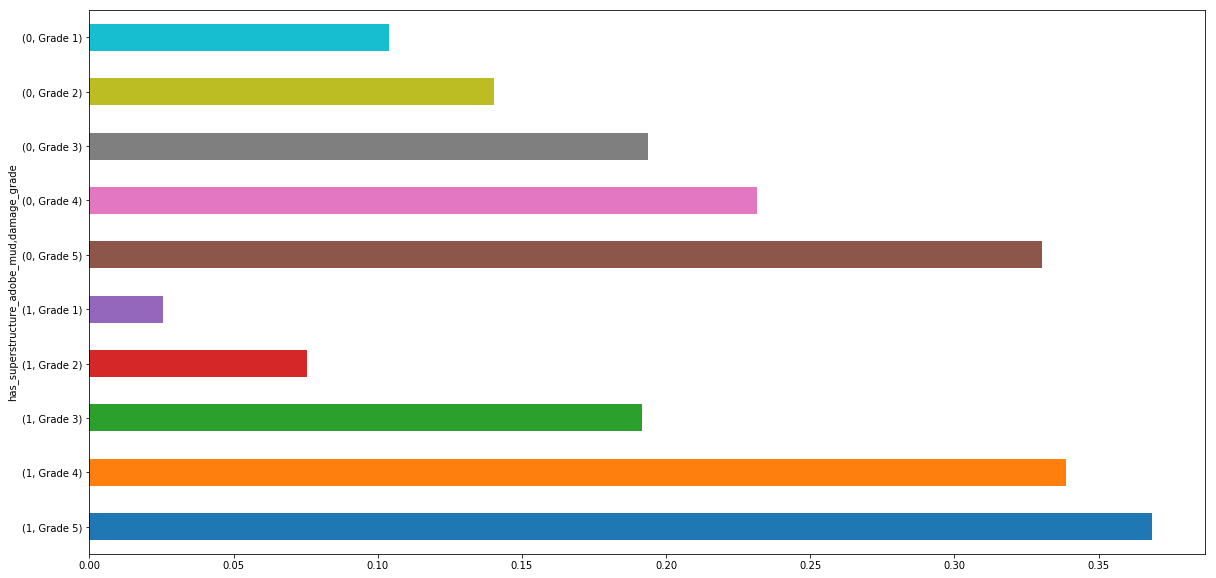

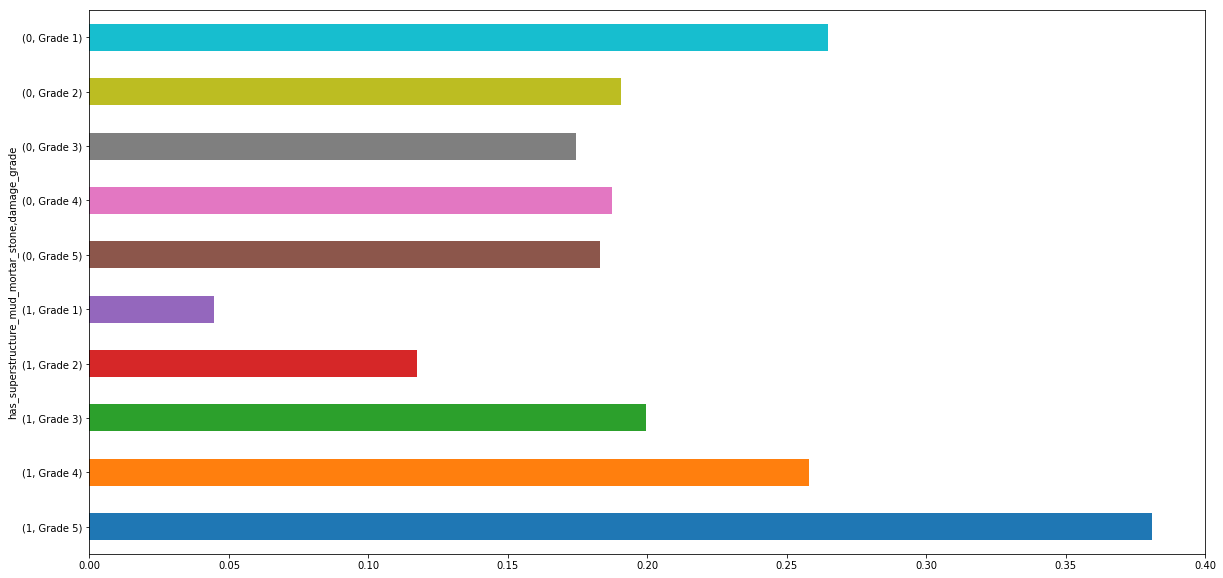

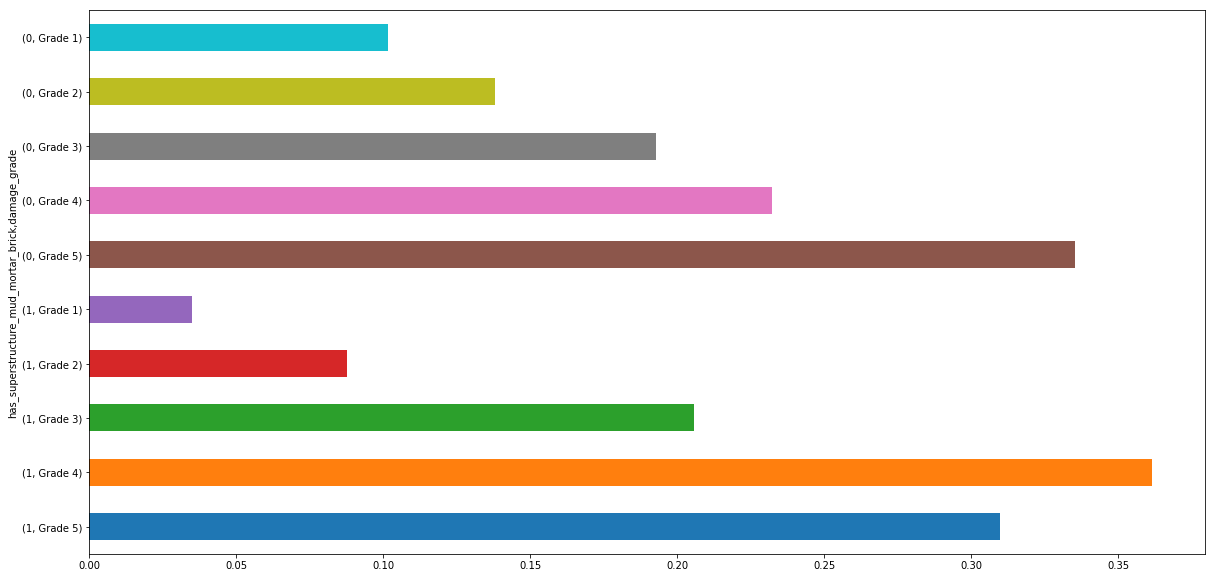

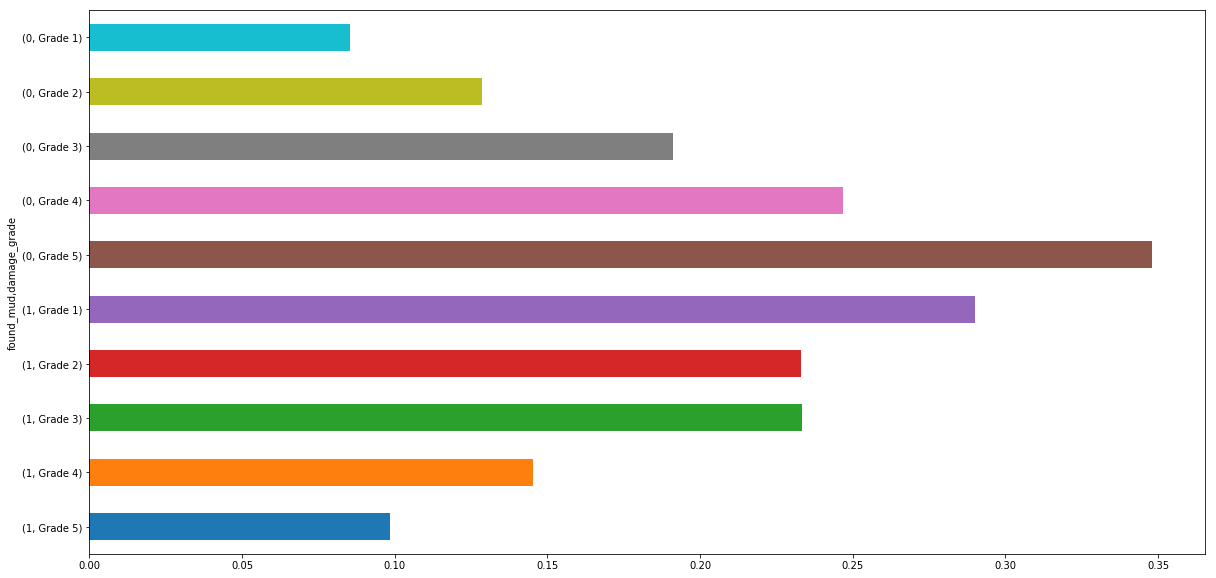

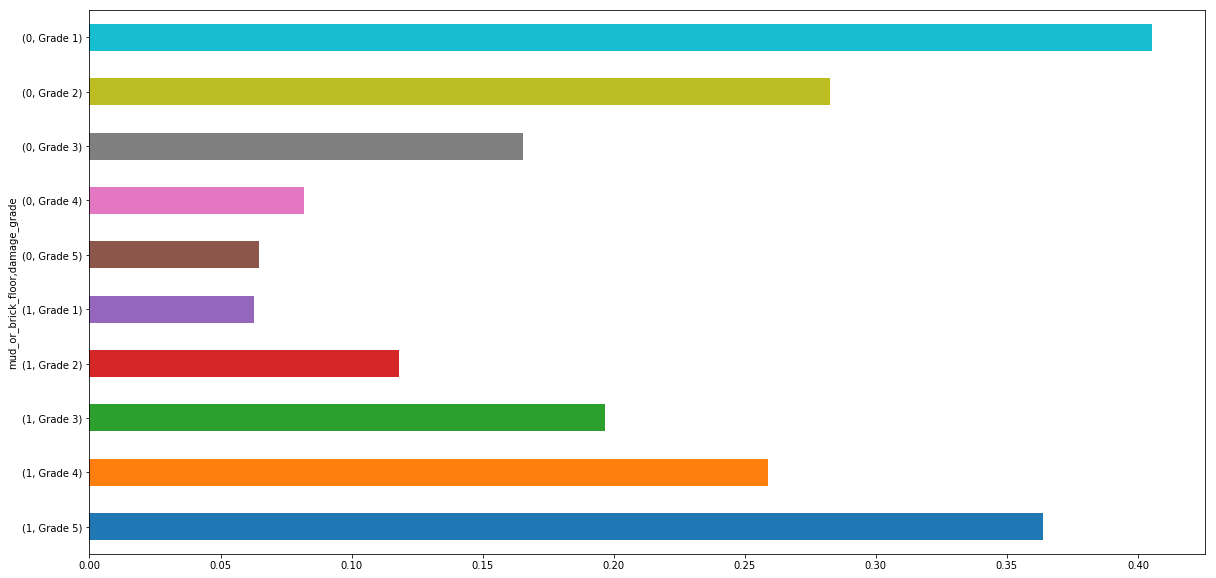

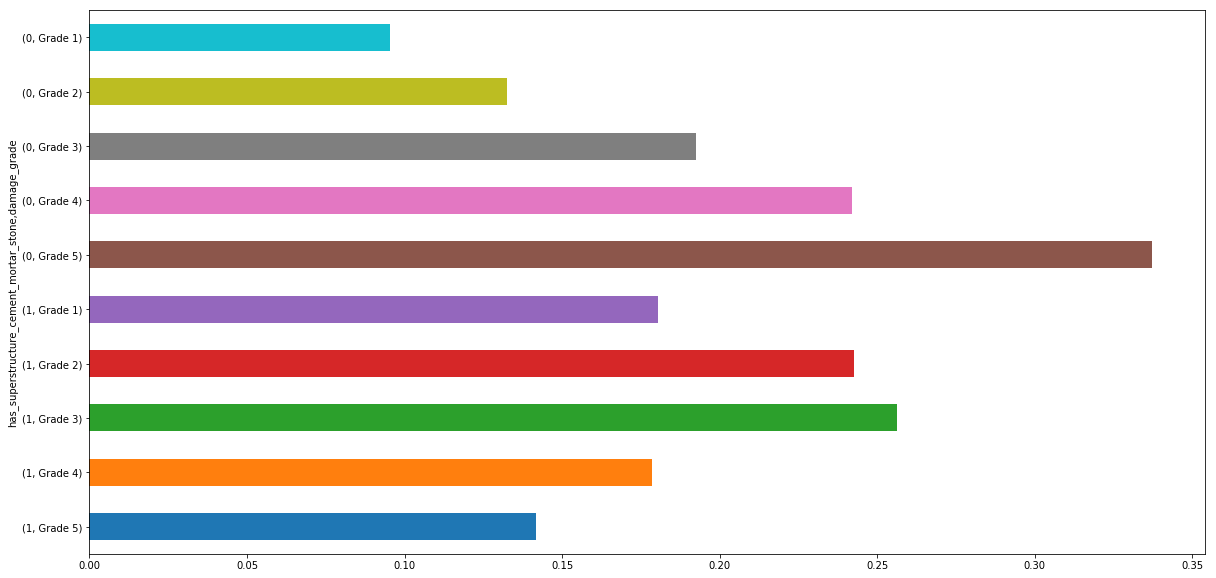

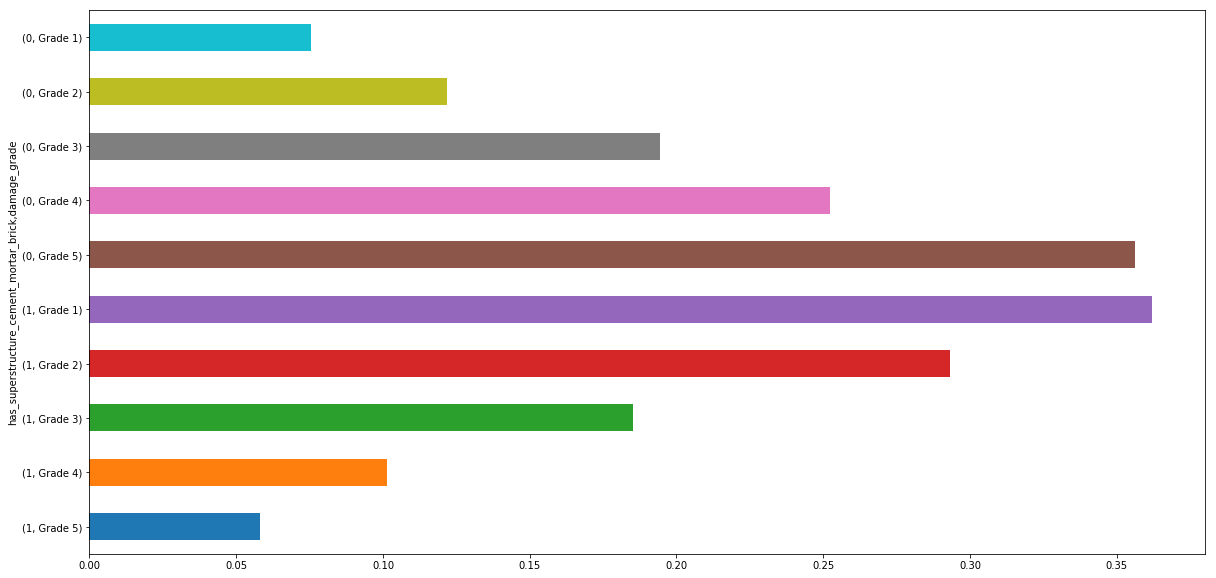

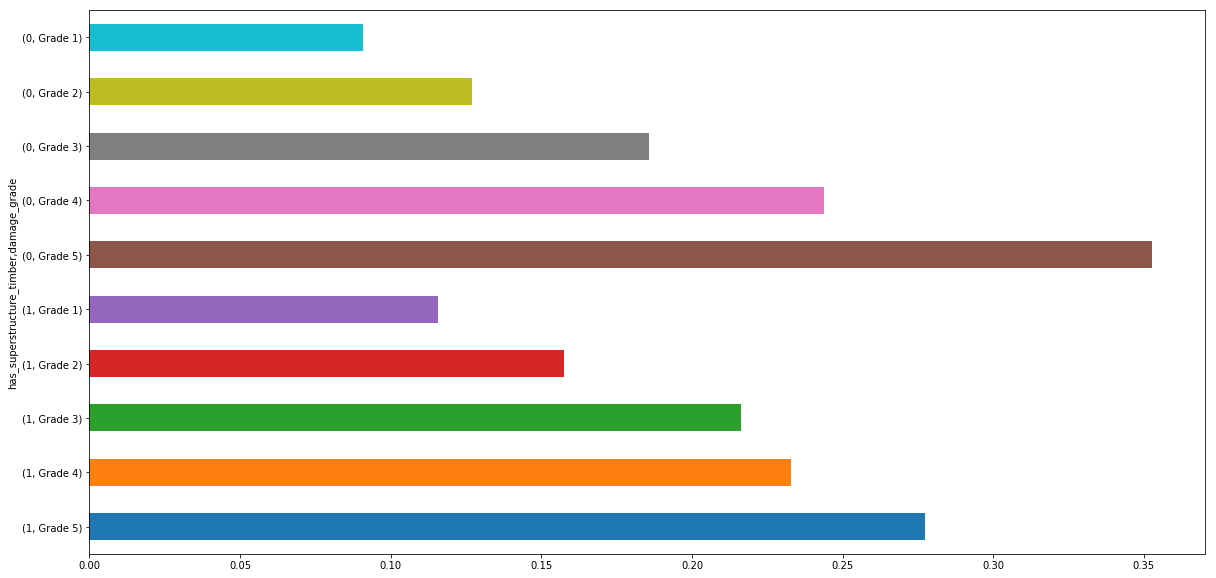

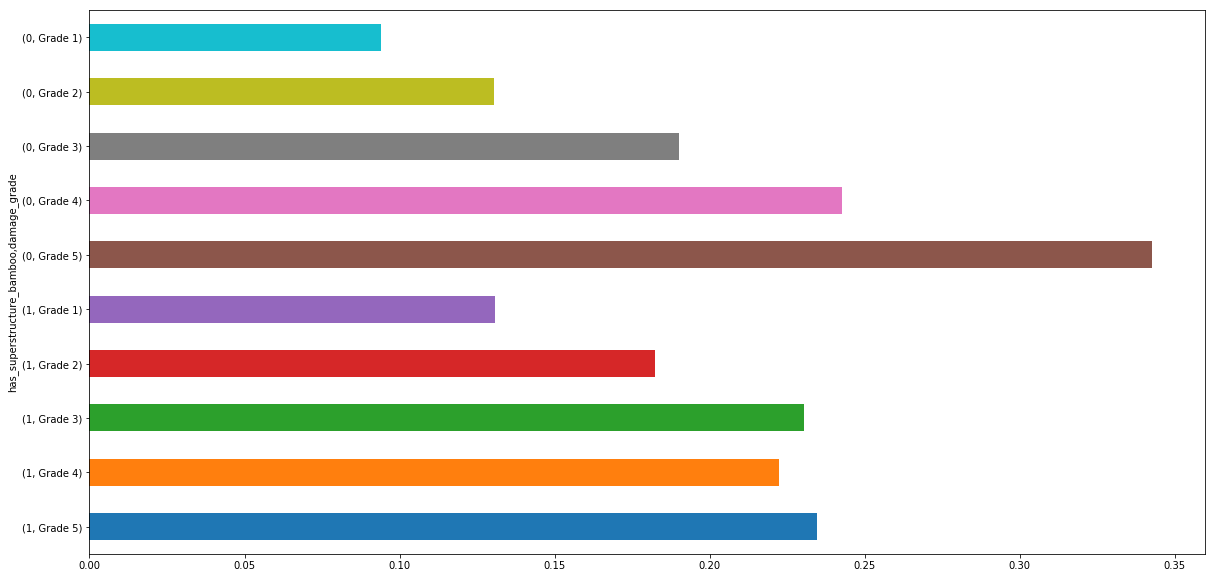

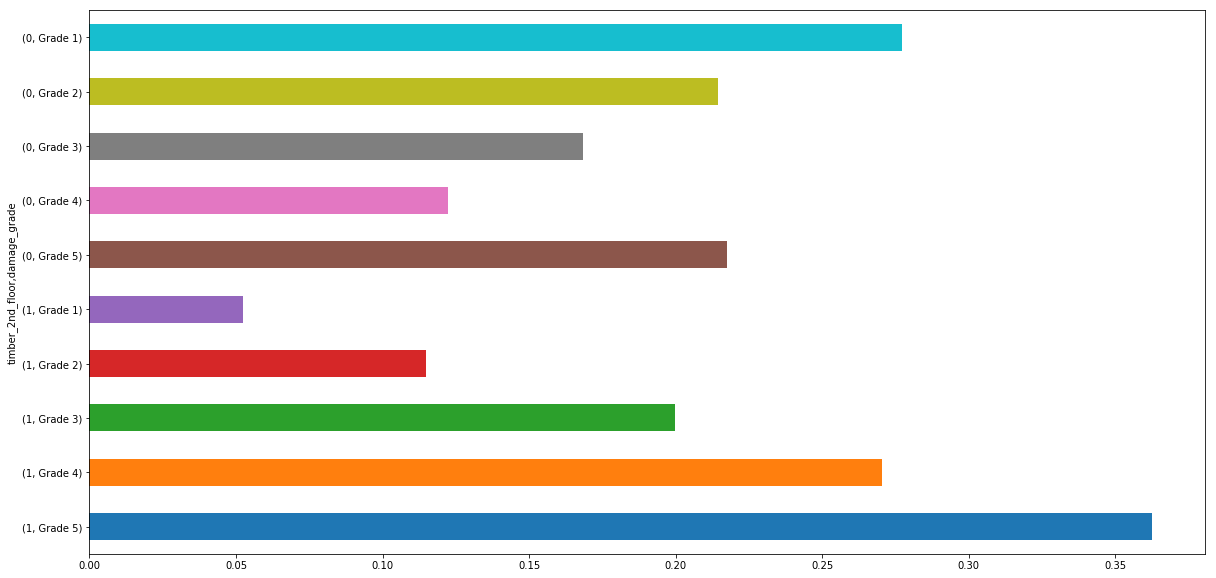

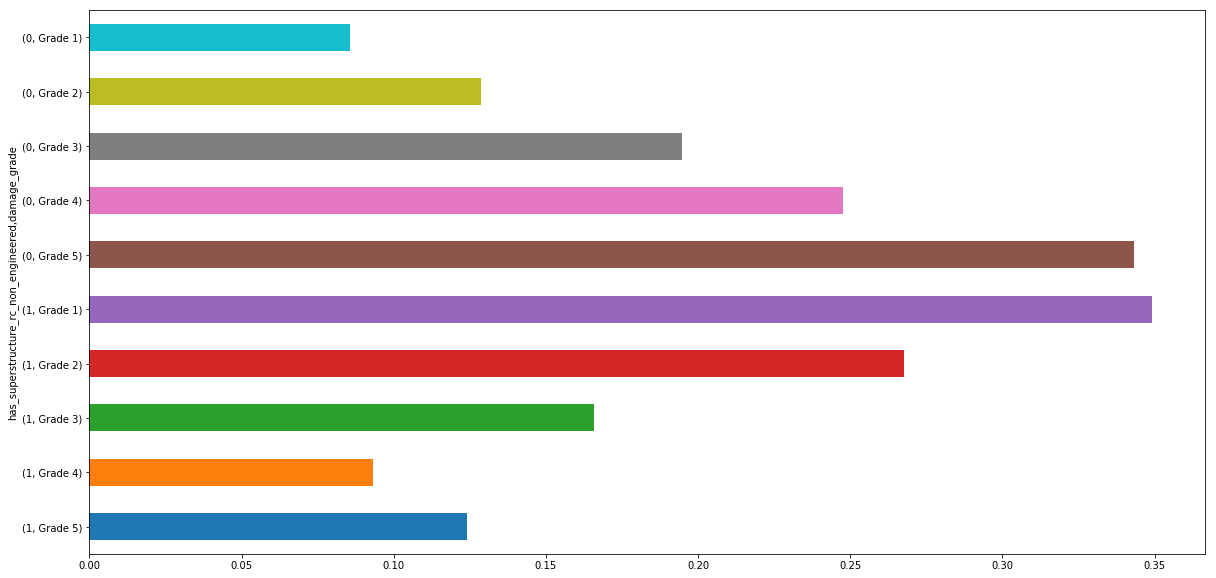

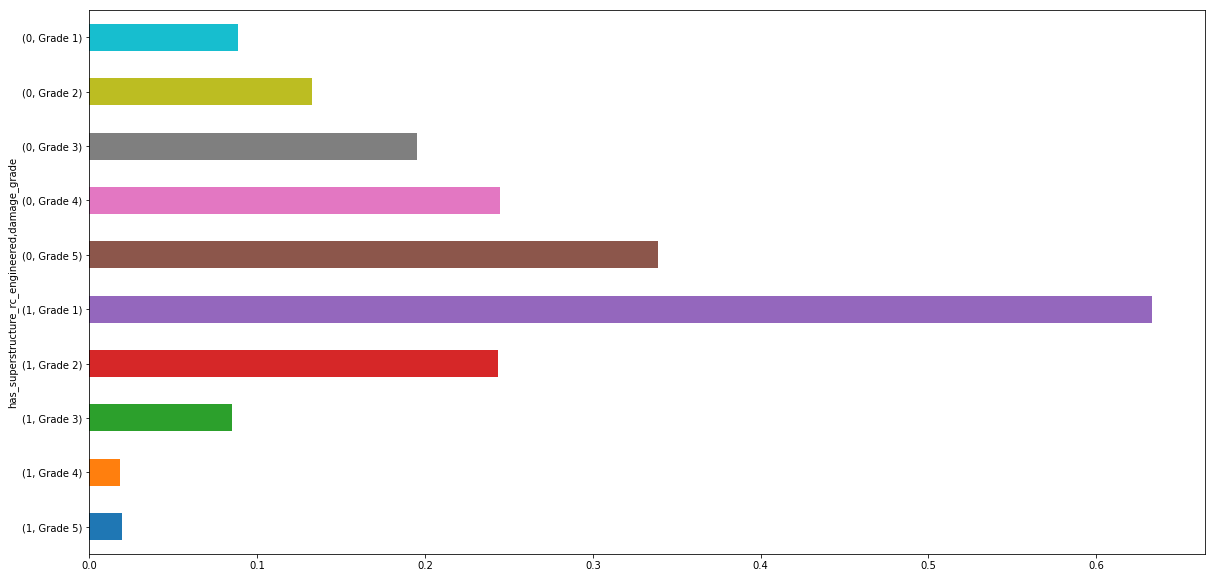

In [15]:
getColumnGroups(dfMergedTrain, [col for col in dfMergedTrain.columns if 'mud' in col])
getColumnGroups(dfMergedTrain, [col for col in dfMergedTrain.columns if 'cement' in col])
getColumnGroups(dfMergedTrain, [col for col in dfMergedTrain.columns if ('timber' in col) or ('bamboo' in col)])
getColumnGroups(dfMergedTrain, [col for col in dfMergedTrain.columns if 'rc_' in col])

# Assessment

In [16]:
# dfMergedTrain['area_assesed'].unique()
# dfMergedTest['area_assesed'].unique()
# dfMergedTrain.isnull().sum()

# dfMergedTrain.groupby(['area_assesed'])['damage_grade'].value_counts().sort_index(ascending=False).plot(kind='bar')

for df in dfList:
    df['not_assessed'] = np.where(np.logical_or(df['area_assesed'] == 'Building removed', df['area_assesed'] == 'Not able to inspect'), 1, 0)
    df['exterior_assessed'] = np.where(df['area_assesed'] == 'Exterior', 1, 0)
    df['ext_and_int_assessed'] = np.where(df['area_assesed'] == 'Both', 1, 0)
    df.drop(['area_assesed'], inplace = True, axis = 1)


# District Bucketing

In [17]:
for df in dfList:
    maxDistId = int(m.ceil(df['district_id'].max()/10.0))
#     maxDistId = int(m.ceil(dfMergedTrain['district_id'].max()/10.0))
#     maxDistIdTest = int(m.ceil(dfMergedTest['district_id'].max()/10.0))
    buckDistr = [-1] + [10*x for x in range(1, maxDistId+1)]
    df['district_id_bucket'] = pd.cut(df.district_id, bins = buckDistr, labels = range(1, len(buckDistr)))
    df.drop(['district_id'], inplace = True, axis = 1)

In [18]:
dfMergedTrain.columns
# dfMergedTrain.groupby(['district_id_bucket'])['damage_grade'].value_counts(normalize=True).sort_index(ascending=False).plot(kind='barh')

Index([u'building_id', u'damage_grade', u'district_id_x',
       u'has_geotechnical_risk', u'has_geotechnical_risk_fault_crack',
       u'has_geotechnical_risk_flood',
       u'has_geotechnical_risk_land_settlement',
       u'has_geotechnical_risk_landslide',
       u'has_geotechnical_risk_liquefaction', u'has_geotechnical_risk_other',
       u'has_geotechnical_risk_rock_fall', u'has_repair_started',
       u'vdcmun_id_x', u'district_id_y', u'vdcmun_id_y', u'ward_id_x',
       u'count_floors_pre_eq', u'count_floors_post_eq', u'age_building',
       u'plinth_area_sq_ft', u'height_ft_pre_eq', u'height_ft_post_eq',
       u'land_surface_condition', u'has_superstructure_adobe_mud',
       u'has_superstructure_mud_mortar_stone',
       u'has_superstructure_stone_flag',
       u'has_superstructure_cement_mortar_stone',
       u'has_superstructure_mud_mortar_brick',
       u'has_superstructure_cement_mortar_brick', u'has_superstructure_timber',
       u'has_superstructure_bamboo', u'has_super

# Geotechnical attributes

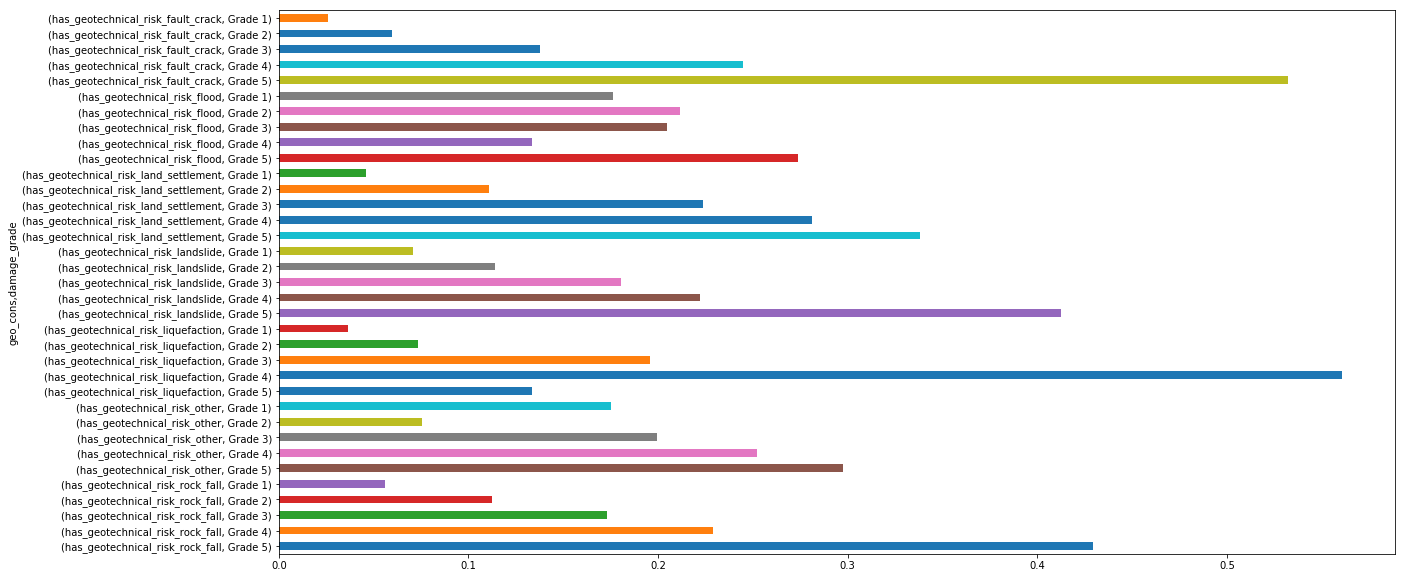

In [19]:
def consolidateGeoTech(row):
    cols = [col for col in dfMergedTrain.columns if col.startswith('has_geotechnical_risk_')]
    for col in cols:
        if row[col] == 1:
            return col

dfMergedTrain['geo_cons'] = dfMergedTrain.apply(consolidateGeoTech, axis = 1)
getColumnGroups(dfMergedTrain, ['geo_cons'])


# dfMergedTrain.groupby(['has_geotechnical_risk'])['damage_grade'].value_counts(normalize=True).plot(kind='barh')
# cols = [col for col in dfMergedTrain.columns if col.startswith('has_geotechnical_risk_')]
# for col in cols:
#     plt.show()
#     col
    
#     dfMergedTrain.groupby([col])['damage_grade'].value_counts(normalize=True).plot(kind='barh')
#     dfMergedTrain.drop(col, inplace = True, axis = 1)
#     dfMergedTest.drop(col, inplace = True, axis = 1)

In [20]:
dfMergedTrain['geo_cons'].unique()

array([None, 'has_geotechnical_risk_landslide',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_other',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_flood', 'has_geotechnical_risk_rock_fall',
       'has_geotechnical_risk_liquefaction'], dtype=object)

In [21]:
geoTechCols_noRelation = ['has_geotechnical_risk_flood', 'has_geotechnical_risk_liquefaction']
for df in dfList:
    df.drop(geoTechCols_noRelation, inplace = True, axis = 1)
    df.drop(['has_geotechnical_risk'], inplace = True, axis = 1)
dfMergedTrain.drop(['geo_cons'], inplace = True, axis = 1)

In [22]:
# dfMergedTrain['has_geotechnical_risk'] = np.where(dfMergedTrain['has_geotechnical_risk'] == 1.0, 1, 0)
dfMergedTrain['has_repair_started'] = np.where(dfMergedTrain['has_repair_started'] == 1.0, 1, 0)

# Land Surface

In [23]:
# dfMergedTrain.groupby(['land_surface_condition'])['damage_grade'].value_counts()# / float(len(dfMergedTrain))
# dfMergedTrain['land_surface_condition'].value_counts()

#getColumnGroups(dfMergedTrain, ['land_surface_condition'])
dfMergedTrain['land_surface_condition'].unique()

# for df in dfList:
#     df = pd.get_dummies(df, columns = ['land_surface_condition'])
#     #df.drop(['land_surface_condition'], inplace = True, axis = 1)

dfMergedTrain = pd.get_dummies(dfMergedTrain, columns = ['land_surface_condition'])
dfMergedTest = pd.get_dummies(dfMergedTest, columns = ['land_surface_condition'])

array(['Flat', 'Steep slope', 'Moderate slope'], dtype=object)

# Building Age

18
999     3301
200      243
199        3
196        2
195        1
193        1
192        1
190        7
188        1
185        1
181        1
180       21
178        1
177        1
176        1
175        4
174        3
173        1
172        2
170       10
168        1
167        1
166        1
165        1
164        1
162        2
161        2
160        9
158        1
156        1
       ...  
29      2670
28      7904
27      8176
26      7299
25     33641
24      6822
23      7005
22     17885
21      7261
20     38955
19      6182
18     16146
17     11039
16     12997
15     40598
14     13550
13     12547
12     27996
11      8914
10     30147
9      11364
8      17442
7      17196
6      14614
5      20994
4      16674
3      17079
2      14389
1      12322
0       3071
Name: age_building, Length: 178, dtype: int64
999     2165
200      179
198        1
195        1
192        1
190        4
187        1
180        9
178        1
176        1
175        1
174        1
17

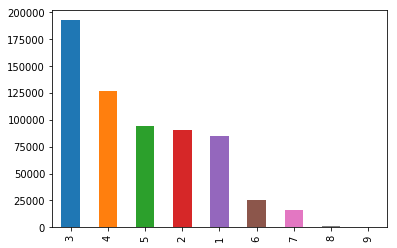

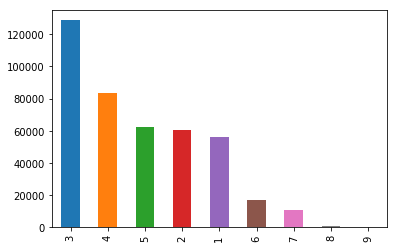

In [24]:
#print (dfMergedTrain['age_building'].value_counts()/float(len(dfMergedTrain['age_building']))).sort_values(ascending=False)
val = int(round(dfMergedTrain['age_building'].median()))
print val
print dfMergedTrain['age_building'].value_counts().sort_index(ascending=False) # 3301 buildings with age 999 (unknown?)
print dfMergedTest['age_building'].value_counts().sort_index(ascending=False)
# print dfMergedTrain['age_building'].isnull().sum()
dfMergedTrain.loc[dfMergedTrain['age_building'] == 999, 'age_building'] = val
dfMergedTest.loc[dfMergedTest['age_building'] == 999, 'age_building'] = val
#print dfMergedTrain['age_building'].value_counts().sort_index(ascending=False)

dfMergedTrain['age'] = pd.cut(dfMergedTrain.age_building, bins=[-1,5,10,20,30, 50, 75, 100, 140, 250], labels=range(1,10))
dfMergedTrain['age'].value_counts().plot(kind='bar')
plt.show()
dfMergedTest['age'] = pd.cut(dfMergedTest.age_building, bins=[-1,5,10,20,30, 50, 75, 100, 140, 250], labels=range(1,10))
dfMergedTest['age'].value_counts().plot(kind='bar')
plt.show()



# Plinth Area
Measurements range from 70 sq ft to 5220

5220       1
5160       1
5000       4
4995       1
4901       1
4890       1
4873       1
4802       1
4800       1
4795       1
4788       1
4738       1
4701       1
4606       1
4600       1
4570       1
4560       1
4557       1
4556       1
4520       1
4502       1
4500       7
4482       1
4475       1
4473       1
4470       1
4465       1
4452       1
4449       1
4445       1
        ... 
100     1022
99       296
98        39
97         4
96       183
95        61
94        30
93         3
92        28
91        55
90       200
89         4
88        33
87         5
86        32
85        71
84        48
82         7
81        62
80       217
79         8
78        29
77        24
76         3
75        70
74         2
73         8
72        43
71         1
70        82
Name: plinth_area_sq_ft, Length: 2069, dtype: int64
300     23211
450     19163
400     17446
350     16872
360     12224
250     11799
280     11006
200     10411
600     10367
320     10158
500      9850
4

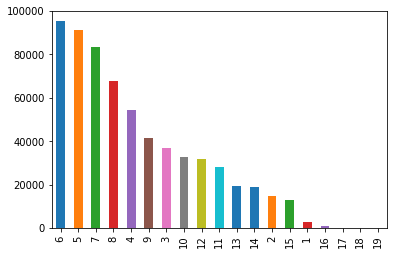

AxesSubplot(0.125,0.125;0.775x0.755)


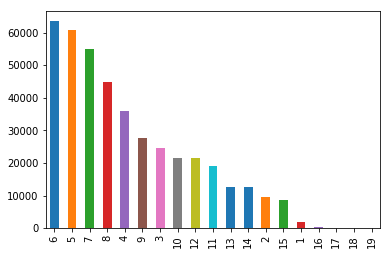

In [25]:
print dfMergedTrain['plinth_area_sq_ft'].value_counts().sort_index(ascending=False)
print dfMergedTrain['plinth_area_sq_ft'].value_counts().sort_values(ascending=False)

print dfMergedTest['plinth_area_sq_ft'].value_counts().sort_index(ascending=False)
print dfMergedTest['plinth_area_sq_ft'].value_counts().sort_values(ascending=False)
# print dfMergedTrain.groupby(['damage_grade'])['plinth_area_sq_ft'].mean()

dfMergedTrain['plinth'] = pd.cut(dfMergedTrain.plinth_area_sq_ft, bins=[-1,100,150,200, 250,300, 350, 400, 450, 500, 550, 600, 700, 800, 1000, 2000, 3000, 4000, 5000, 6000], labels=range(1,20))
dfMergedTest['plinth'] = pd.cut(dfMergedTest.plinth_area_sq_ft, bins=[-1,100,150,200, 250,300, 350, 400, 450, 500, 550, 600, 700, 800, 1000, 2000, 3000, 4000, 5000, 6000], labels=range(1,20))


print dfMergedTrain['plinth'].value_counts().plot(kind='bar')
plt.show()
print dfMergedTest['plinth'].value_counts().plot(kind='bar')
# dfMergedTrain.head()

# Secondary Use

['has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

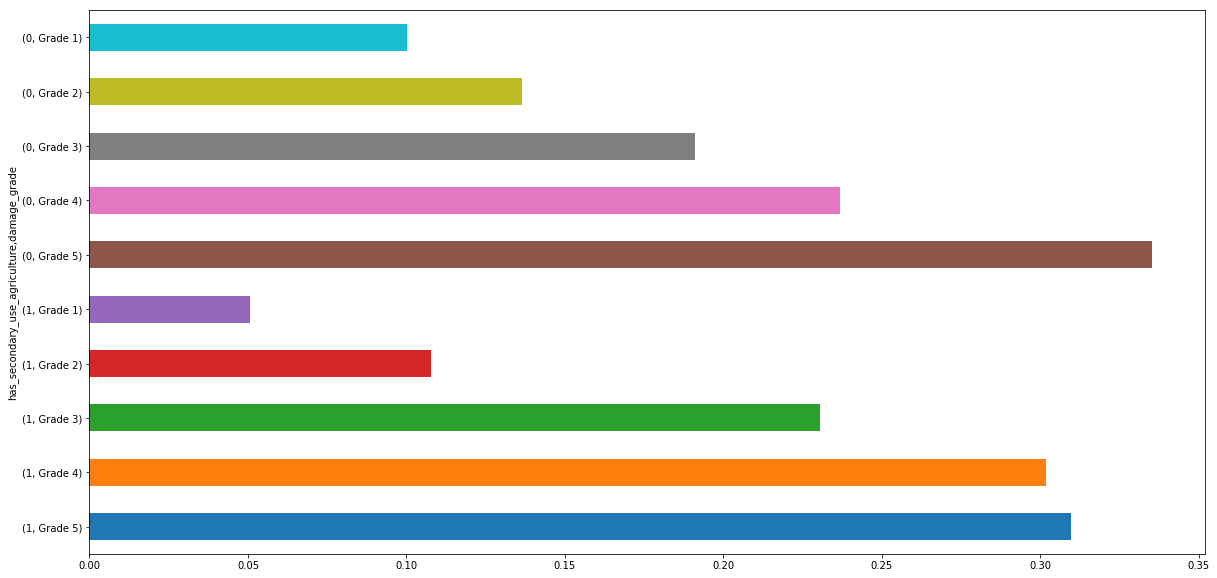

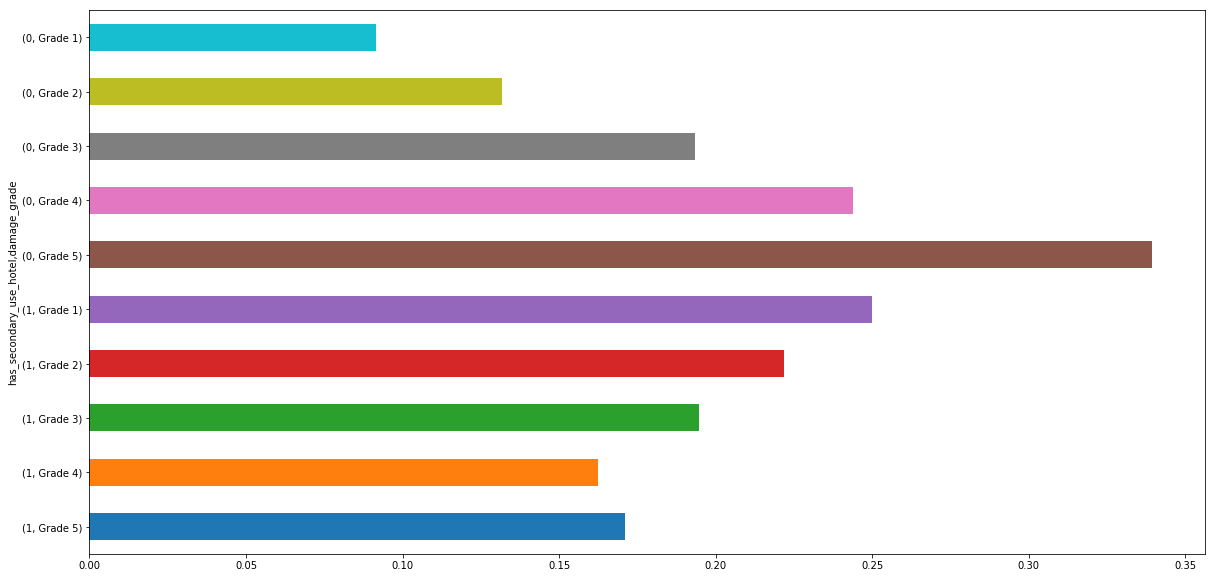

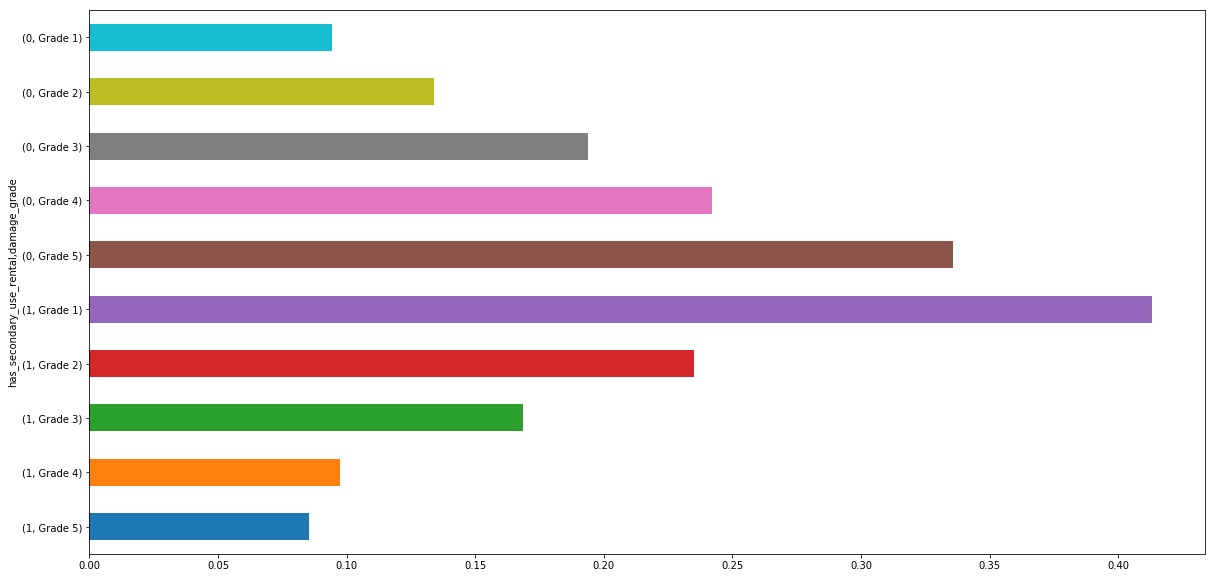

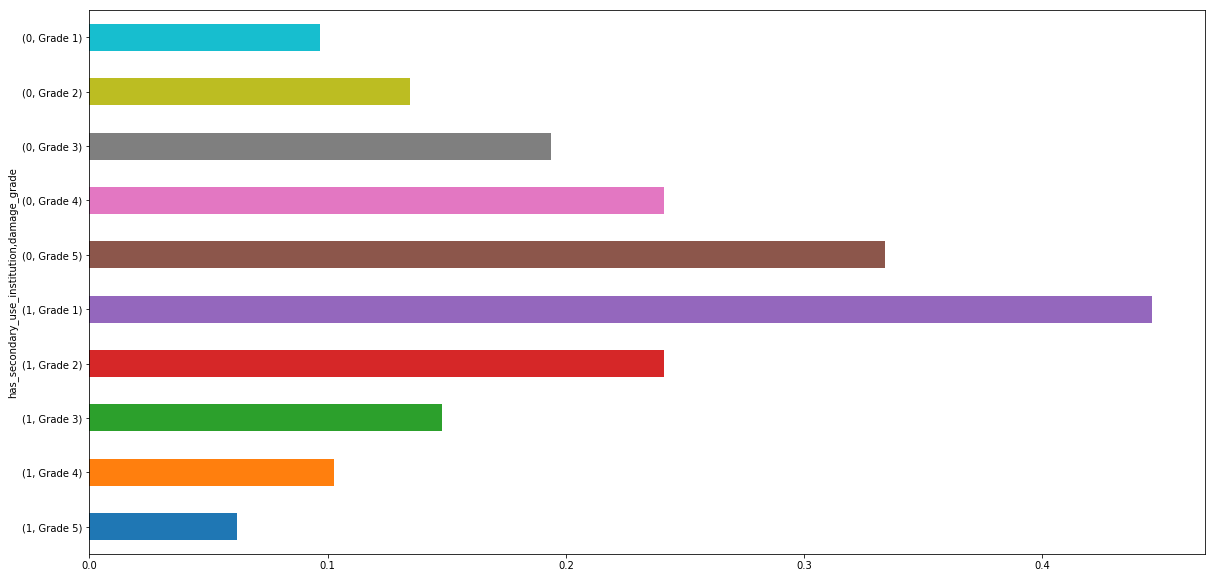

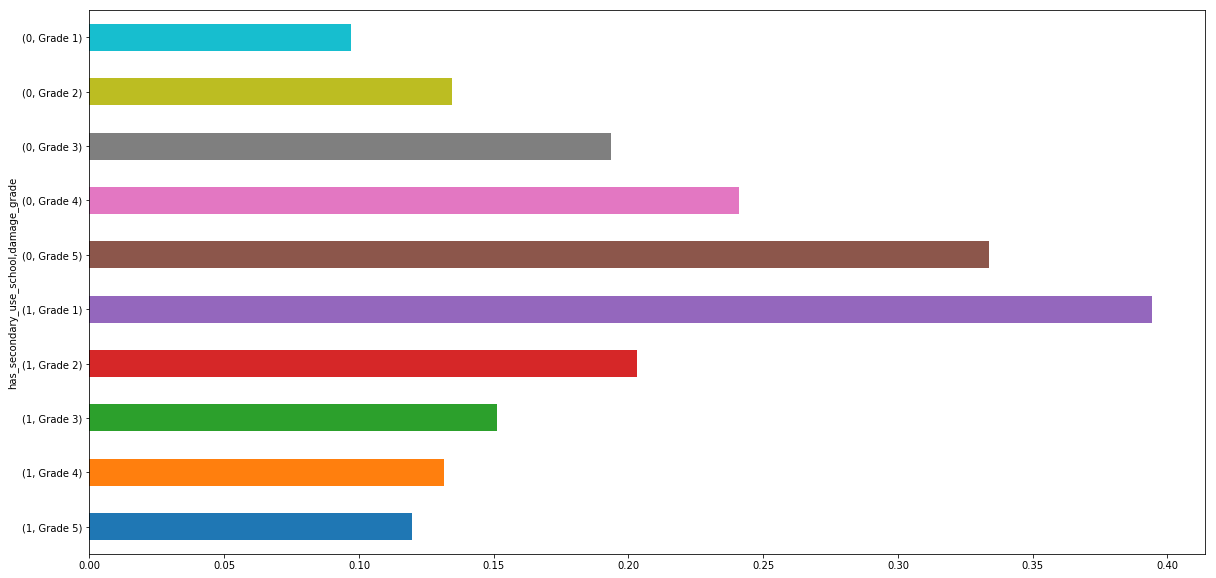

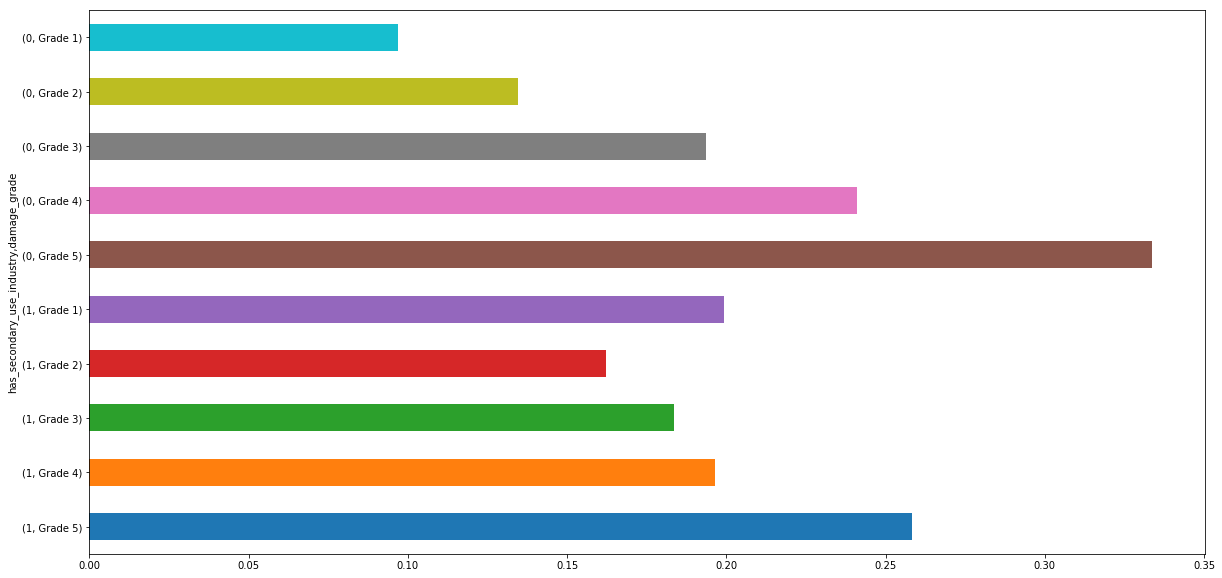

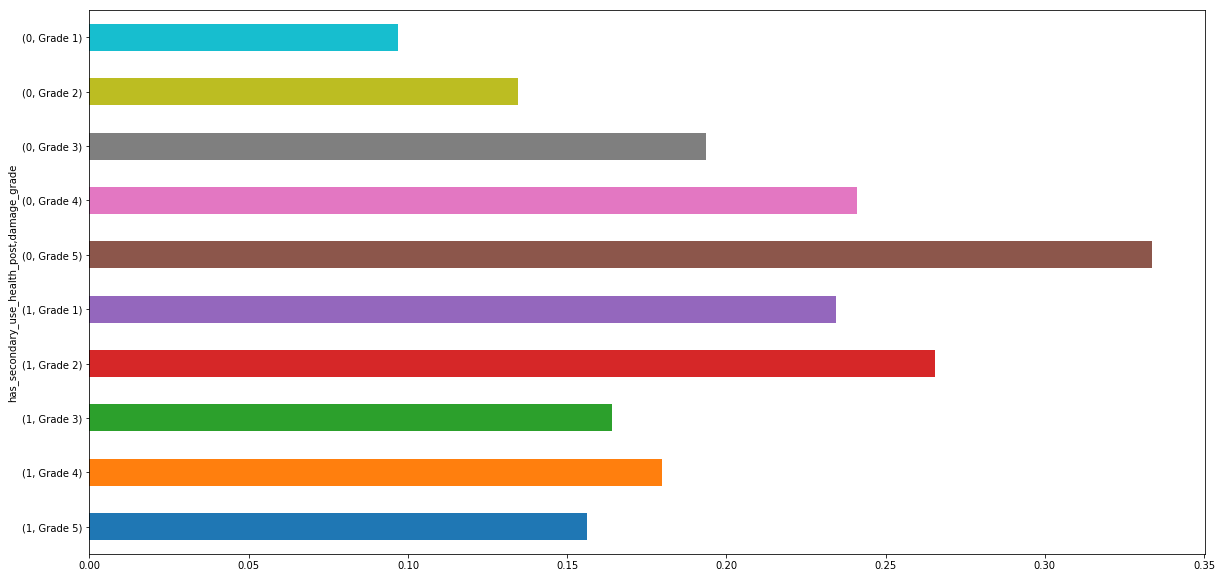

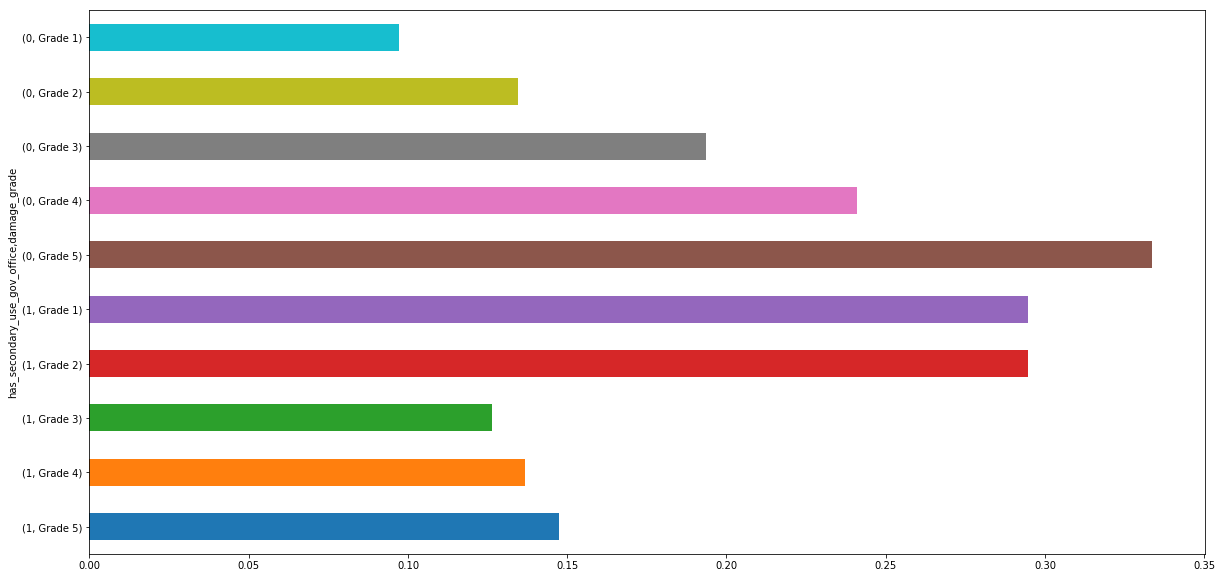

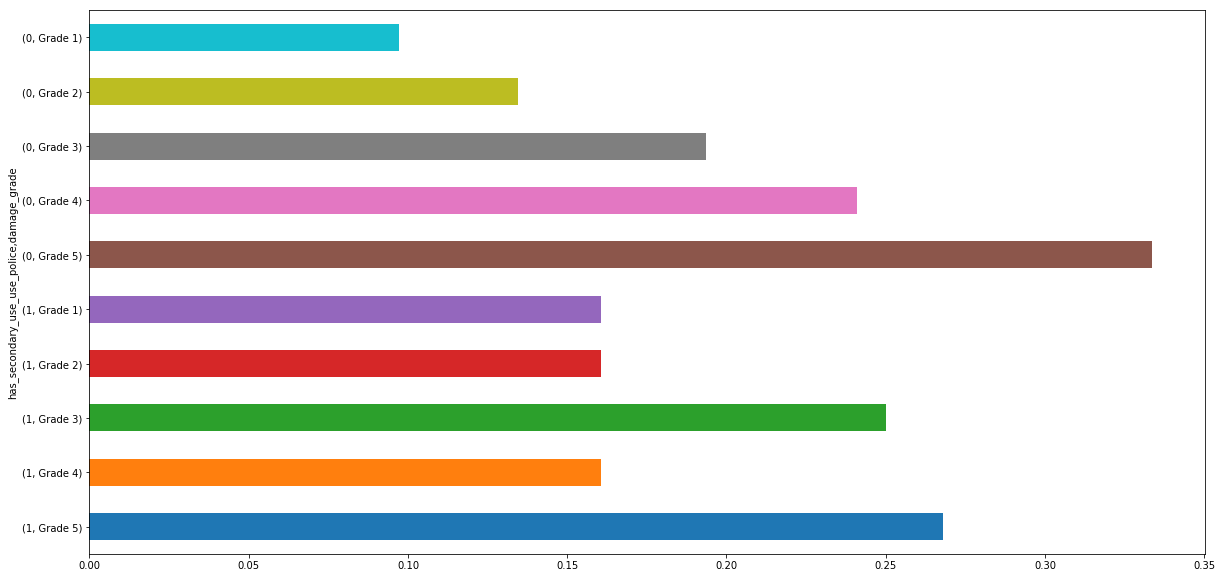

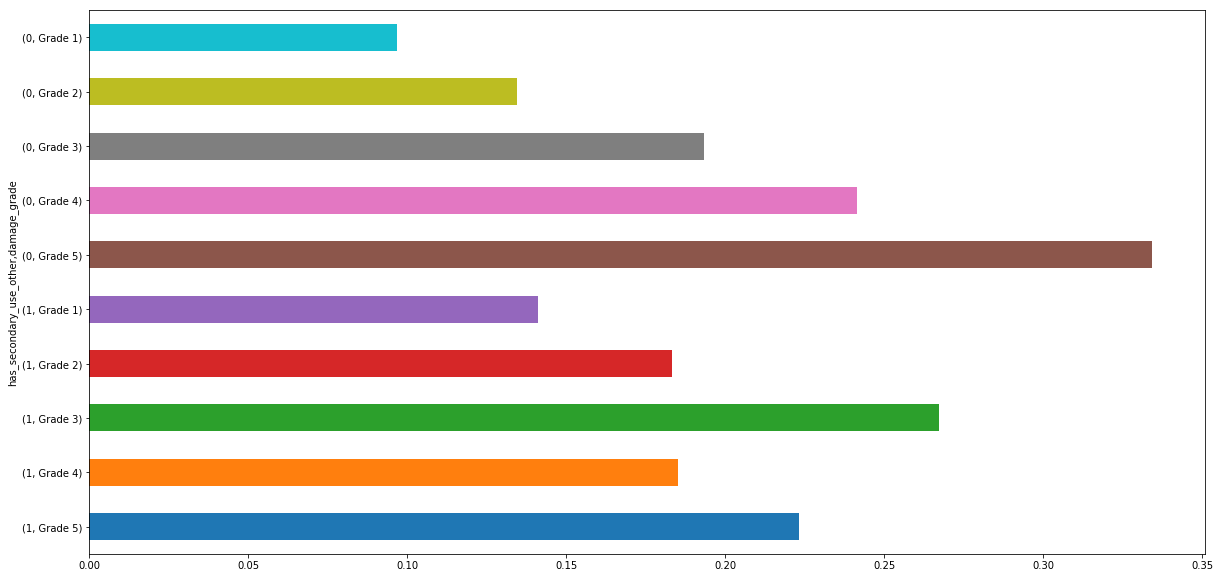

In [26]:
secUse = [col for col in dfMergedTrain.columns if col.startswith('has_secondary_use_')]
secUse
getColumnGroups(dfMergedTrain, secUse)
cols_irrelevant = ['has_secondary_use_other', 'has_secondary_use_use_police', 'has_secondary_use_industry', 'has_secondary_use_health_post', ]
for df in dfList:
    df.drop(cols_irrelevant, inplace = True, axis = 1)
    df['has_secondary_use'] = np.where(df['has_secondary_use'] == 1.0, 1, 0)


    


In [27]:
trainCols = set(dfMergedTrain.columns.values.tolist())
testCols = set(dfMergedTest.columns.values.tolist())

In [28]:
# get columns that contain null vals
nullCols = list(dfMergedTrain.columns[dfMergedTrain.isnull().mean() > 0])
print nullCols

# drop repeated columns (repeat occurs due to df merge, duplicated columns have _y in the name)
listRepeatCols = ['district_id_x', 'district_id_y', 'vdcmun_id_x', 'vdcmun_id_y', 'ward_id_y']
dfMergedTrain.drop(listRepeatCols, inplace = True, axis = 1)
dfMergedTest.drop(listRepeatCols, inplace = True, axis = 1)

['count_families']


In [29]:
nullColsTest = list(dfMergedTest.columns[dfMergedTest.isnull().mean() > 0])
print nullColsTest

# test set missing 5% values for has_repair_started
#print dfMergedTest.isnull().mean()
dfMergedTest.has_repair_started = dfMergedTest.groupby(['condition_post_eq', 'private'])['has_repair_started'].apply(lambda x: x.fillna(x.median()))
# dfMergedTest[dfMergedTest['has_repair_started'].isnull()]
dfMergedTest.head(20)

['has_repair_started']


,building_id,has_geotechnical_risk_fault_crack,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,vdcmun_id,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,found_RC,found_mud,tree_roof,mud_or_brick_floor,RC_floor,timber_2nd_floor,RC_2nd_floor,attached_1_side,attached_0_side,rectangular,square,private,not_assessed,exterior_assessed,ext_and_int_assessed,district_id_bucket,land_surface_condition_Flat,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,age,plinth
0,a3380c4f75,0,0,0,0,0,1.0,70102,1,1,28,454,9,9,0,1,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used,701,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,4,9
1,a338a4e653,0,0,0,0,0,1.0,70103,1,0,25,542,9,0,0,1,0,0,0,0,1,1,0,0,1,Damaged-Rubble unclear,701,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,4,10
2,a338a4e6b7,0,0,0,0,0,1.0,70103,2,0,35,589,18,0,0,1,0,0,0,0,1,1,0,0,0,Damaged-Rubble Clear-New building built,701,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,5,11
3,a33a6eaa3a,0,0,0,0,0,1.0,70106,2,2,22,468,18,18,0,1,1,0,0,0,1,1,0,0,1,Damaged-Repaired and used,701,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,4,9
4,a33b073ff6,0,0,0,0,0,1.0,70107,1,0,24,426,9,0,0,1,1,0,0,0,1,1,0,0,1,Damaged-Rubble Clear-New building built,701,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,4,8
5,6604e4896c6,0,0,0,0,0,0.0,70107,2,2,35,468,18,18,0,1,1,0,0,0,1,1,0,0,1,Damaged-Used in risk,701,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,5,9
6,a33b07430f,0,0,0,0,0,1.0,70107,2,2,26,654,18,18,0,1,1,0,0,0,1,1,0,0,1,Damaged-Repaired and used,701,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,4,12
7,a33c386cf3,0,0,0,0,0,1.0,70109,2,0,36,546,18,0,0,1,0,0,0,0,1,1,0,0,1,Damaged-Rubble Clear-New building built,701,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,5,10
8,a33c386ee7,0,0,0,0,0,1.0,70109,2,2,35,465,18,18,0,1,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used,701,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,5,9
9,a33c38700f,0,0,0,0,0,1.0,70109,1,1,35,464,9,9,0,1,0,0,0,0,1,1,0,0,1,Damaged-Not used,701,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,5,9


In [30]:
# cols = list(dfMergedTrain.columns.values)
# for c in sorted(cols):
#     print c

In [31]:
listConstant = [col for col in dfMergedTrain.columns if (dfMergedTrain[col].dtype in ['float64', 'int64'] and dfMergedTrain[col].std() == 0) or (dfMergedTrain[col].dtype == 'object' and len(dfMergedTrain[col].unique()) == 1)]
print len(listConstant) , ' constant features in data set'
dfMergedTrain.shape

0  constant features in data set


(631761, 61)

In [32]:
dfMergedTrain.drop(['age_building'], inplace = True, axis = 1)
dfMergedTrain.drop(['plinth_area_sq_ft'], inplace = True, axis = 1)

dfMergedTest.drop(['age_building'], inplace = True, axis = 1)
dfMergedTest.drop(['plinth_area_sq_ft'], inplace = True, axis = 1)

In [33]:
def quasiConstant(dfTrain, dfTest):
    listQuasi = []
    for col in dfTrain.columns:
        if col not in ['building_id', 'damage_grade']:
            dom = (dfTrain[col].value_counts() / float(len(dfTrain))).sort_values(ascending=False).values[0]
            if dom > .985 or col == 'ward_id_x':
                # print col, dom
                listQuasi.append(col)
    print listQuasi
    print len(listQuasi) , ' quasi constant features in data set'
    dfTrain.drop(listQuasi, inplace = True, axis = 1)
    dfTest.drop(listQuasi, inplace = True, axis = 1)

In [34]:
x = set(dfMergedTrain.columns) - set(dfMergedTest.columns)
y = set(dfMergedTest.columns) - set(dfMergedTrain.columns)
x
y
quasiConstant(dfMergedTrain, dfMergedTest)

{'damage_grade'}

set()

['has_geotechnical_risk_other', 'ward_id_x', 'has_superstructure_other', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other']
11  quasi constant features in data set


In [35]:
cnt = 0
listCatVars = []
for col in dfMergedTrain.columns:
    if dfMergedTrain[col].dtype == 'object' and col != 'building_id' and col != 'damage_grade':
        print col , len(dfMergedTrain[col].unique()) , dfMergedTrain[col].unique()
        listCatVars.append(col)
        cnt += len(dfMergedTrain[col].unique())
print 'one hot encoding will add ', cnt ,' features to dataset '
#dfMergedTrain['legal_ownership_status'].unique()

condition_post_eq 8 ['Damaged-Not used' 'Damaged-Repaired and used' 'Not damaged'
 'Damaged-Rubble clear' 'Damaged-Used in risk' 'Damaged-Rubble unclear'
 'Damaged-Rubble Clear-New building built' 'Covered by landslide']
one hot encoding will add  8  features to dataset 


count_families


 1.0     547837
 0.0      50659
 2.0      27771
 3.0       4185
 4.0        939
 5.0        262
 6.0         73
 7.0         19
 8.0          9
 9.0          5
 11.0         1
NaN           1
Name: count_families, dtype: int64


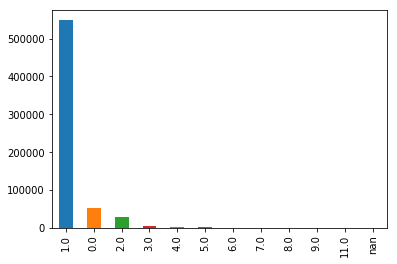

In [36]:
# get distributions of columns containing null
for col in nullCols:
    print col
    #(dfMergedTrain[col].value_counts()/float(len(dfMergedTrain))).sort_values(ascending = False).plot(kind = 'bar')\
    dfMergedTrain[col].value_counts(dropna = False).sort_values(ascending = False).plot(kind = 'bar')
    print dfMergedTrain[col].value_counts(dropna = False).sort_values(ascending = False)
    plt.show()

In [37]:
# engineering missing values in numerical col (count_families)
val = int(round(dfMergedTrain['count_families'].mean()))
dfMergedTrain['count_families'].fillna((val), inplace=True)
dfMergedTrain['count_families'].value_counts(dropna = False).sort_values(ascending = False)

1.0     547838
0.0      50659
2.0      27771
3.0       4185
4.0        939
5.0        262
6.0         73
7.0         19
8.0          9
9.0          5
11.0         1
Name: count_families, dtype: int64

In [38]:
# engineer has_repair_started
dfMergedTrain.has_repair_started = dfMergedTrain.groupby(['condition_post_eq'])['has_repair_started'].apply(lambda x: x.fillna(x.median()))
print dfMergedTrain['has_repair_started'].value_counts(dropna = False).sort_values(ascending = False)

0    442639
1    189122
Name: has_repair_started, dtype: int64


In [39]:
# ohe
#for var in listCatVars:
# dfMergedTrain = pd.get_dummies(dfMergedTrain, columns = listCatVars)
# dfMergedTest = pd.get_dummies(dfMergedTest, columns = listCatVars)

In [40]:
def heightLost(df):
    # idea - have a column df[floor_lost] that is df[count_floors_pre_eq] = df[count_floors_post_eq], same for height_ft_post_eq, height_ft_pre_eq
    # dfMergedTrain['floors_lost'] = dfMergedTrain['count_floors_pre_eq'] - dfMergedTrain['count_floors_post_eq']
    print df.shape
    df['height_lost'] = df['height_ft_pre_eq'] - df['height_ft_post_eq']
    df.drop(['count_floors_pre_eq', 'count_floors_post_eq', 'height_ft_pre_eq', 'height_ft_post_eq'], inplace = True, axis = 1)
    print df.shape

In [41]:
heightLost(dfMergedTrain)
heightLost(dfMergedTest)

(631761, 48)
(631761, 45)
(421175, 47)
(421175, 44)


In [42]:
# get incident counts by district_id
# dfMergedTrain.groupby(['district_id_bucket'])['damage_grade'].value_counts()

In [43]:
# get correlations
corrmat = dfMergedTrain.corr().abs().unstack()
corrmat = corrmat[corrmat > .8]
corrmat = corrmat[corrmat < 1]
print corrmat

mud_or_brick_floor                     RC_floor                                 0.967121
RC_floor                               mud_or_brick_floor                       0.967121
attached_1_side                        attached_0_side                          0.824188
attached_0_side                        attached_1_side                          0.824188
land_surface_condition_Flat            land_surface_condition_Moderate slope    0.884128
land_surface_condition_Moderate slope  land_surface_condition_Flat              0.884128
dtype: float64


In [44]:
# drop vdcmun_id col, since municipality highly correlated to district
target = dfMergedTrain['damage_grade']
dfMergedTrain.drop(['vdcmun_id', 'building_id', 'damage_grade'], inplace = True, axis = 1)


dfMergedTest.drop(['vdcmun_id', 'building_id'], inplace = True, axis = 1)

In [45]:
dfMergedTrain['cnt_fam'] = pd.cut(dfMergedTrain.count_families, bins=[-1,.9,1.9,2.9, 100], labels=range(1,5))
dfMergedTest['cnt_fam'] = pd.cut(dfMergedTest.count_families, bins=[-1,.9,1.9,2.9, 100], labels=range(1,5))
dfMergedTrain.drop(['count_families'], inplace = True, axis = 1)
dfMergedTest.drop(['count_families'], inplace = True, axis = 1)

In [46]:


print dfMergedTrain.shape
print dfMergedTest.shape

(631761, 42)
(421175, 42)


# Damage Post EQ

In [47]:
# for df in dfList:
#     # getColumnGroups(dfMergedTrain, ['condition_post_eq'])
#     # dfMergedTrain['condition_post_eq'].unique()
#     df = pd.get_dummies(df, columns = ['condition_post_eq'])
#     #df.drop(['condition_post_eq'], inplace = True, axis = 1)

dfMergedTrain = pd.get_dummies(dfMergedTrain, columns = ['condition_post_eq'])
dfMergedTest = pd.get_dummies(dfMergedTest, columns = ['condition_post_eq'])

In [ ]:
# print dfMergedTrain.shape
# Create and fit selector
for ks in [30, len(dfMergedTrain)]:
    print ks , "*******************************************************************************************************"
    selector = SelectKBest(f_classif, k=ks)
    selector.fit(dfMergedTrain, target)
    # Get idxs of columns to keep
    idxs_selected = selector.get_support(indices=False)
    print idxs_selected
    # Create new dataframe with only desired columns, or overwrite existing
    features = selector.transform(dfMergedTrain)
    print features.shape

    # used for evaluating model params with GridSearchCV
    k_range = range(1, 20)
    weight_options = ['uniform', 'distance']
    #mD = range(4, 15)
    mD = range(4, 20)
    #nEst = range(5, 17)
    nEst = range(5, 20)
    split = ['best', 'random']
    #min_split =range(2, 5)
    min_split =range(5, 20)
    class_w = [{0:.3, 1:.7}, {0:.2, 1:.8}, None]
    priors = [None]
    #hiddenUnits = range(2,15)
    hiddenUnits = [x for x in it.product((5,10,15,20, 30),repeat=2)]
    #hiddenUnits = [x for x in it.product((2, 4, 6),repeat=2)]
    #activation = ["identity", "logistic", "tanh"]
    activation = ["identity"]
    #solver = ['lbfgs', 'adam', 'sgd']
    solver = ['adam']
    max_iter = [200]
    max = 0

#     # rand forest
#     param_grid = dict(max_depth=mD, min_samples_split=min_split, n_estimators = nEst)
#     grid = GridSearchCV(RandomForestClassifier(random_state = 0), param_grid, cv = 10, scoring = 'accuracy', verbose = 4)


    # nn
    param_grid = dict(solver=solver, activation = activation, max_iter=max_iter, hidden_layer_sizes = hiddenUnits)
    grid = GridSearchCV(MLPClassifier(random_state = 0), param_grid, cv = 10, scoring = 'accuracy', verbose = 5)

    # bayes
    # param_grid = {}
    # grid = GridSearchCV(GaussianNB(), param_grid, cv = 10, scoring = 'accuracy', verbose = 10)

    grid.fit(features, target)
    print grid.best_score_
    print grid.best_params_
    if (grid.best_score_ > max):
        max = grid.best_score_
    print max

30 *******************************************************************************************************


SelectKBest(k=30, score_func=<function f_classif at 0x000000002A243AC8>)

[ True False False False  True  True  True False False False  True False
 False  True  True False False  True  True  True  True  True  True  True
  True False False False False  True  True  True  True  True False False
 False  True  True  True False False  True  True  True  True  True  True
  True]
(631761L, 30L)
Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5) 
[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5), score=0.70595777011, total=  17.6s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5) 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.4s remaining:    0.0s


[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5), score=0.710421349204, total=  17.6s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5) 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   36.8s remaining:    0.0s


[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5), score=0.707651397638, total=  18.8s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5) 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   56.5s remaining:    0.0s


[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5), score=0.707730539112, total=  18.8s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5) 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5), score=0.708275294416, total=  16.5s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5) 
[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5), score=0.708175702414, total=  18.9s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5) 
[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5), score=0.707843292442, total=  18.8s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5) 
[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5), score=0.704677483182, total=  19.0s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5) 
[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5), score=0.7073637889, total=  19.9s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 5) 
[CV]  activation=

[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 30), score=0.706355362089, total=  20.2s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 30) 
[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 30), score=0.70344281757, total=  20.1s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 30) 
[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 30), score=0.707696204135, total=  14.7s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 30) 
[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(5, 30), score=0.708266058822, total=  14.8s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(10, 5) 
[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(10, 5), score=0.706844154611, total=  12.1s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(10, 5) 
[CV]  

[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(10, 20), score=0.704883260784, total=  15.6s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(10, 20) 
[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(10, 20), score=0.70706303226, total=  19.5s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(10, 20) 
[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(10, 20), score=0.70595498148, total=  19.6s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(10, 30) 
[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(10, 30), score=0.706606730191, total=  14.9s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(10, 30) 
[CV]  activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(10, 30), score=0.711228592231, total=  23.4s
[CV] activation=identity, max_iter=200, solver=adam, hidden_layer_sizes=(10, 30

In [46]:
# # used for evaluating model params with GridSearchCV
# k_range = range(1, 20)
# weight_options = ['uniform', 'distance']
# #mD = range(4, 15)
# mD = range(7, 15)
# #nEst = range(5, 17)
# nEst = range(7, 15)
# split = ['best', 'random']
# #min_split =range(2, 5)
# min_split =range(8, 15)
# class_w = [{0:.3, 1:.7}, {0:.2, 1:.8}, None]
# priors = [None]
# #hiddenUnits = range(1,5)
# #hiddenUnits = [x for x in it.product((10,20,30,40,50,100),repeat=3)]
# hiddenUnits = [x for x in it.product((2, 4, 6),repeat=3)]
# activation = ["identity", "logistic", "tanh", 'relu']
# solver = ['lbfgs', 'adam', 'sgd']
# #max_iter = [300, 500, 700]
# max = 0

# # rand forest
# param_grid = dict(max_depth=mD, min_samples_split=min_split, n_estimators = nEst)
# grid = GridSearchCV(RandomForestClassifier(random_state = 0), param_grid, cv = 10, scoring = 'accuracy', verbose = 8)


# # nn
# # param_grid = dict(solver=solver, activation = activation, max_iter=max_iter, hidden_layer_sizes = hiddenUnits)
# # grid = GridSearchCV(MLPClassifier(random_state = 0), param_grid, cv = 10, scoring = 'accuracy', verbose = 10)

# # bayes
# param_grid = {}
# #grid = GridSearchCV(GaussianNB(), param_grid, cv = 10, scoring = 'accuracy', verbose = 10)
# grid = GridSearchCV(GaussianProcessClassifier(.5*RBF(1.0)), param_grid, cv = 5, scoring = 'accuracy', verbose = 10)

# grid.fit(dfMergedTrain, target)
# print grid.best_score_
# print grid.best_params_
# if (grid.best_score_ > max):
#     max = grid.best_score_
# print max

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


MemoryError: 

In [39]:
selector = SelectKBest(f_classif, k=30)
selector.fit(dfMergedTrain, target)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=False)
print idxs_selected
# Create new dataframe with only desired columns, or overwrite existing
features = selector.transform(dfMergedTrain)

# clf = RandomForestClassifier(min_samples_split=9, n_estimators=9, max_depth=10, random_state=0)#.fit(dfMergedTrain, target)
# scores = cross_val_score(clf, features, target, cv=10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) #Accuracy: 0.70 (+/- 0.01)

# clf = DecisionTreeClassifier(min_samples_split=2, max_depth=None, random_state=0)#.fit(dfMergedTrain, target)
# scores = cross_val_score(clf, target, cv=10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) #Accuracy: 0.70 (+/- 0.01)

# clf = MLPClassifier(activation='identity', max_iter=700, solver='adam', hidden_layer_sizes=(2), random_state=0)#.fit(dfMergedTrain, target)
# scores = cross_val_score(clf, dfMergedTrain, target, cv=10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) #Accuracy: 0.70 (+/- 0.00)

[False False False False False  True False  True False False False  True
 False False  True  True False False False False  True  True  True False
  True False False False  True  True  True False  True False  True  True
 False  True False  True False  True  True  True False False False False
 False False False False False False False False False False False False
  True  True  True  True  True  True  True False False False False  True
  True  True False]
Accuracy: 0.70 (+/- 0.00)


In [40]:
# clf = RandomForestClassifier(min_samples_split=9, n_estimators=9, max_depth=10, random_state=0).fit(dfMergedTrain, target) # 65%
clf = MLPClassifier(activation='identity', max_iter=700, solver='adam', hidden_layer_sizes=(2, 4), random_state=0).fit(dfMergedTrain, target)
predArray = clf.predict(dfMergedTest)
#updatedTestArray = array(dfTest.iloc[:, :])
with open("output.csv","w") as f:
    f.write("building_id,damage_grade\n")
    for x in range(0, len(predArray)):
        predVal = predArray[x]
        # f.write(str(dfMergedTest.iloc[x,1]) + "," + str(predVal)[1:-1] +"\n")
        f.write(str(buildingId[x]) + "," + str(predVal) +"\n")
        # f.write(str(buildingId[x]) + "," + str(1) +"\n")

NameError: name 'buildingId' is not defined

In [ ]:
# cols = ['district_id', 'count_families']
# for c in cols:
#     x = dfMergedTrain[c].value_counts().sort_index()
#     print x#(dfMergedTrain[c].value_counts() / float(len(dfMergedTrain))).sort_index()
#     x.plot(kind='bar')
#     #(dfMergedTrain[c].value_counts() / float(len(dfMergedTrain))).sort_index().plot(kind='bar')
#     plt.show()

In [ ]:
# x = dfMergedTrain['cnt_fam'].value_counts().sort_index()
# print x#(dfMergedTrain[c].value_counts() / float(len(dfMergedTrain))).sort_index()
# x.plot(kind='bar')